Accuracy: 0.8279352226720648
Precision (Attrition = Yes): 0.8354430379746836
Recall (Attrition = Yes): 0.8114754098360656


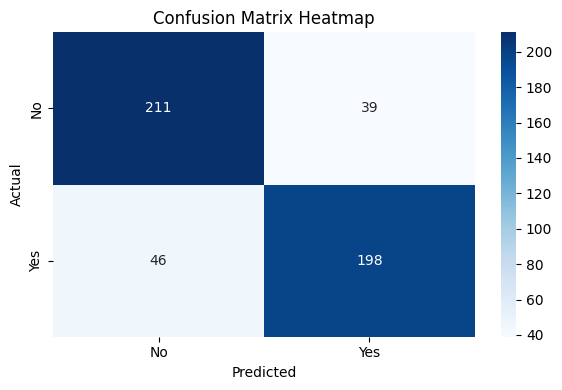

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/6. Predict Employee Attrition.csv")

# Drop irrelevant columns
df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select relevant features
selected_features = [
    "JobSatisfaction", "MonthlyIncome", "EnvironmentSatisfaction",
    "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]
X = df[selected_features]
y = df["Attrition"]

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
precision = report["1"]["precision"]
recall = report["1"]["recall"]

# Print metrics
print("Accuracy:", accuracy)
print("Precision (Attrition = Yes):", precision)
print("Recall (Attrition = Yes):", recall)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
